In [1]:
from template.data_modules.MovingMNIST.MovingMNIST import MovingMNIST
from yasin_utils.image import plot_grid

In [2]:
dataset = MovingMNIST('/home/yasin/repos/autoencoder/template/data_modules/MovingMNIST', train=True, download=True)

In [3]:
X, T = dataset[10]

In [4]:
X.shape, T.shape

(torch.Size([10, 64, 64]), torch.Size([10, 64, 64]))

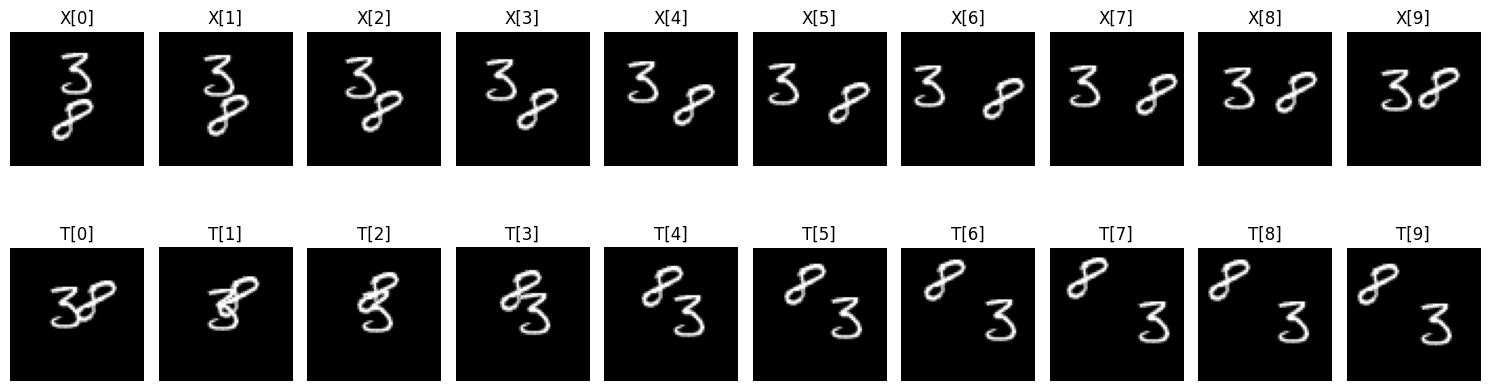

In [5]:
import matplotlib.pyplot as plt

# Plot X and T in a grid
fig, axes = plt.subplots(2, X.shape[0], figsize=(15, 5))

for i in range(X.shape[0]):
    axes[0, i].imshow(X[i], cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title(f'X[{i}]')

    axes[1, i].imshow(T[i], cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title(f'T[{i}]')

plt.tight_layout()
plt.show()

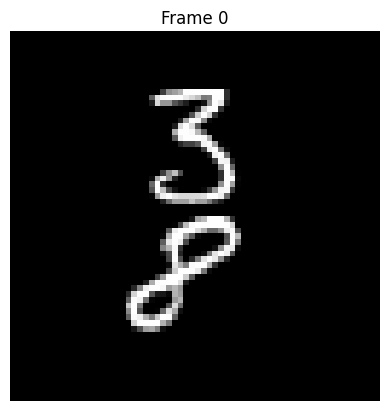

In [7]:
import torch
import matplotlib.animation as animation
from IPython.display import HTML

# Concatenate X and T along dimension 0
XT = torch.cat((X, T), dim=0)

fig, ax = plt.subplots()
ax.set_axis_off()

def update(frame):
    ax.imshow(XT[frame], cmap='gray')
    ax.set_title(f'Frame {frame}')

ani = animation.FuncAnimation(fig, update, frames=XT.shape[0], interval=50)
HTML(ani.to_jshtml())